# How to start your first data science project - a practical tutorial for beginners
                               
------

                                        Author: Juan L. Kehoe (juanluo2008@gmail.com)
------
# Introduction
------
I'm sure everyone on the Internet is flooded by data science and artificial intelligent a lot in recent years. Some of you might be attracted by the sexist job of the 21st Century - Data Scientist [1], and want to become one. You google "how to become a data scientist" and will find tons of blog posts and articles. From the first page of the search result, you open some links and read them. You will find all of them are pretty good, with details of what a data scientist is, what kind of background do they need etal. Then things like linear algebra, probability, statistics, Python, R, machine learning, domain knowledge are all over you. You might be scared by how many things you will need to learn before you become a Data Scientist and you want to walk away. To be fare, all those requirments listed above are almost equivalent to the curriculum for a Ph.D. in Data Science. For a beginner, you are like a elementary school student trying to know something about Data Science, you don't need those Ph.D. curriculum to scare you. Here, I'm going to show you another way to look at it. Just like to show you how to become a chef, I'm not going to list all the skills and background that you need to become a Iron Chef which might be your ultimate goal actually. But I'm going to show you a simple recipe so you can just mix some ingredients together, do some very easy preparation and then put the dish in the oven and you will have your first experience as a chef. After you finish experiencing, you can decide if you enjoy the process or not. If yes, you can continue to learn more and more. Afterall, Rome is not built in one day. You can start small and then you have the chance to grow big. Same here, I'm going to use a very simple dataset (the Titanic dataset from Kaggle.com) to show you how to finish a simple data science project using Python and yellowbrick, from exploratory data analysis, to feature selection and feature engineering, to model building and evaluation. 

# Python and yellowbrick installation
------
Although you don't need to know how to program yet, you will still need a programming language to finish the project. If you are a chef, programming languages are the pots and pans and other stuff you need to cook. As mentioned aboce, we are going to use Python and the yellowbrick package.   
## Why Python and yellowbrick
You can check the following link to see why we choose to use Python and yellowbrick for our project:  

## How to install Python and yellowbrick
Before you use Python yellowbrick, you will need to install them on your computer first. The following links will show you how to install them on different operating systems:   
Mac: https://youtu.be/kbDLiWRG2vk   
Windows: 


# Workflonw of a data science project
------
Before we start, I want to introduce you the workflow of how to start and finish a data science project. As shown in the picture below, to start a data science project, you need to decide what the problem is. Ask yourself a question what do you want to solve. It could be "who would survive on Titanic?" like in the example we will show below. Or anything that you can think of that you will be able to use some data and do some prediction. Then you need to come up with an idea of what kind of data you will need as to solve your problem and how to collect them. After that you need to start collecting your data and do some exploratory data analysis (EDA). In the feature selection and feature engineering step, you might need to delete some featrues or add some new features. After you decide the features you want to feed into the model, you can start training your models. Then you need to evaluate your models. If the models are good, you will be able to use them to predict yor future data. Otherwise, you will have to go back to previous steps to do some improvement to see if you get better models. Depending on the diagnosis from your model evaluation step, you might go back to any of the previous steps and do some modifications to see if that help with your model performance. You might need to go through the green part in the picture again and again for a lot times before you get to a good model. There also could be the case that after you go through the green part numerous times and still couldn't find a good model. That's when you need to start a new project. 


![data_science_workflow](./data_science_workflow.png)

# Case study:  Who would survive - Titanic dataset from Kaggle.com
------
I will show you how to start your first project via a easy example. In this project, we will use the data of the passengers and crew on Titanic to predict who survived the tragedy. We will not go through all the steps as mentioned above since it will be a simple start. We will skip the first three steps and go directly to the EDA part by using an existing dataset from Kaggle.com. It will be the [Titanic](https://www.kaggle.com/c/titanic) dataset. Please download the data from [Kaggle]( https://www.kaggle.com/c/titanic/data). You need to put the downloaded datasets into the same folder as your Ipython Notebook file. Before you start doing anything, you can read some basic information of this dataset on Kaggle while you download the data.


Just want to let you know that I will keep my explanation in minimal which means I will not explain why we do this and that in each step, just like when you follow a recipe to cook a cake, you just follow the steps but don't need to figure out why we use flour but not rice and other stuff too. However, I do want you to ask a lot of questions in your mind and write them down later. You can send these questions to me via email (juanluo2008@gmail.com) or comment under this post or try to figure them out yourself by googling them. And also I will attach some links in each step, if you are interested you can dig into more. That way you will learn a lot beside everything from here.
  

## Brief peak into the dataset
------
Before we do EDA, we need to peak into the dataset a little to see what's the data look like, what features do they have. The file you downloaded should be .csv files. If you google "csv file", you will know it's abbriviate for "comma-seperated values file". When you read the .csv file in by the pandas package in Python, it will read in as a table, with each line as a row and each comma seperated item a column.

In [4]:
# import packages needed for the procedure
import pandas as pd

# read data as data
data = pd.read_csv("train.csv")

# check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (891, 12)


As we can see above, the dimension of the table is (891, 12) which means there are 891 rows and 12 columns in the table. Each row in the table represents a passenger or a member of the crew, each column represents the information for that person which is also known as variable. 

I copied the description of the features from Kaggle.com [2] as follows so we know the the information better:

#### Data Dictionary
|Variable|	Definition|	Key|  
|:---|:---|:---|
|survival|Survival|0 = No, 1 = Yes|  
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|  
|sex|Sex| |	  
|Age|Age in years| |	  
|sibsp|# of siblings / spouses aboard the Titanic| |	  
|parch|# of parents / children aboard the Titanic| |	  
|ticket|Ticket number| |
|fare|Passenger fare| |	
|cabin|Cabin number| |	
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
#### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [5]:
# show the first 5 rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


By showing the first 5 rows of the data, we can see the data is a mixture of numerical (PassengerId, Survivied, Pclass, Age, SibSp, Parch, Fare), categorical (Sex, Cabin, Embarked) and text data (Name, Ticket). Technically, Survivied and Pclass are categorical too, but they are represented in number form in this data. There are missing values too, which are represented as "NaN" as in the "Cabin" column. 

The purpose of this project is to predict the "Survived" variable using other variables. So "Survived" variable can also be called "target" and other variables be called "features".

## Exploratory data analysis (EDA)
------
EDA is used to explore the target and features so we know if we will need to transform or normalize some of the features based on the distribution of them, or if we need to delete some of the features because it might not be able to give us any information in predicting future outcomes or create some new features that might be use for the prediction. The following link is an easy introduction of EDA I liked: https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm   

It's always good if you start your EDA process by asking lots of questions. Then you can generate figures and tables to answer these question. For visulization, I will mainly use [matplotlib](https://matplotlib.org/) and [yellowbrick](http://www.scikit-yb.org/en/latest/).
 
To start with, I will ask some simple questions and then try to fill the answers by some figures and tables. If you have more questions, feel free to write them down and try to figure out how to answer them or you can always send me an email or comment under my post. 

The questions I want to ask are:

1. What are the variables look like:    
   For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories.   
   
2. Are the numerical variables correlated?  

3. Are the distribution of numerical variables the same or different among survived and not survived:    
   Is the survival rate differnt for different values? For example, if there are more people survived if they are younger.   
   
4. Are there different survival rates in different categories?    
   For example, if there are more women survived than man.



### 1. What are the variables look like?
To answer this question, first I'm going to check the summary of the variables, then make some histograms for the numerical variables, and some barplots for the categorical variables.

#### Summary of the variables

In [3]:
# summary of all the numerical variable
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


For all the numerical variables, you will know the average (mean), standard deviation (std), minumum value (min), maximum value (max) and different percentile (25%, 50% and 75%) of the data. Also from the count of data, we could know that there are missing value for some of the variables. Like the "Age" variable, there are only 714 data points instead of 891.

In [22]:
# summary of all the objective variables (including categorical and text)
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mudd, Mr. Thomas Charles",male,1601,G6,S
freq,1,577,7,4,644


For all the objective variables (categorical and text), you can see how many categories are in each variable from the "unique" row. Like in the "Sex" variable, there are 2 categories.

Summary of all the variables in tables like this can give you very rough idea of how the variables look like. However, to check more details and have more insight of the data, we will need to deeper and use more visulization technique. 

#### Histograms of the numerical variables
Histograms are very good visulization technique to check the distribution of numerical data.

In this data, "PassengerId" are unique numbers from 1-891 to label each person. And "Survived" and "Pclass" was basically categorical data. I will not plot a histogram for these variables. 

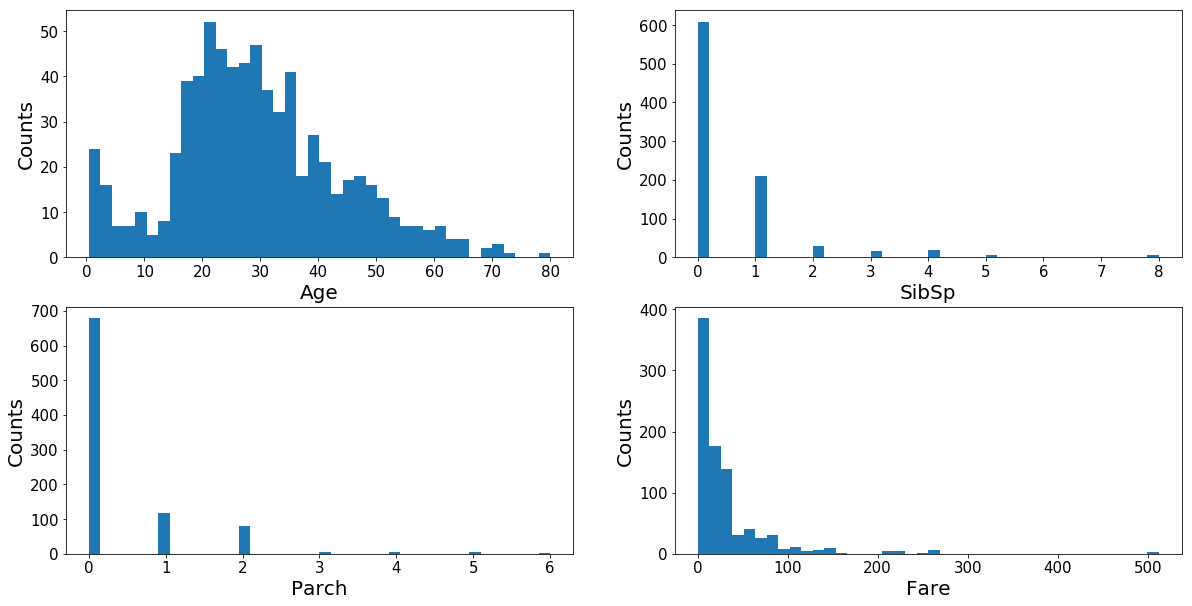

In [53]:
# import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

From the histogram, we see that all the values in the variables seems in the correct range.  Most of the people on the boat are around 20 to 30 years old. Most of the people don't have siblings or relatives go with them. And a large amount of the tickets are less than \$50. There are very small amount of tickets are over \$500.

#### Barplot for the categorical data
Since "Ticket" and "Cabin" have too many levels (more than 100), I will not make the barplot for these variables.

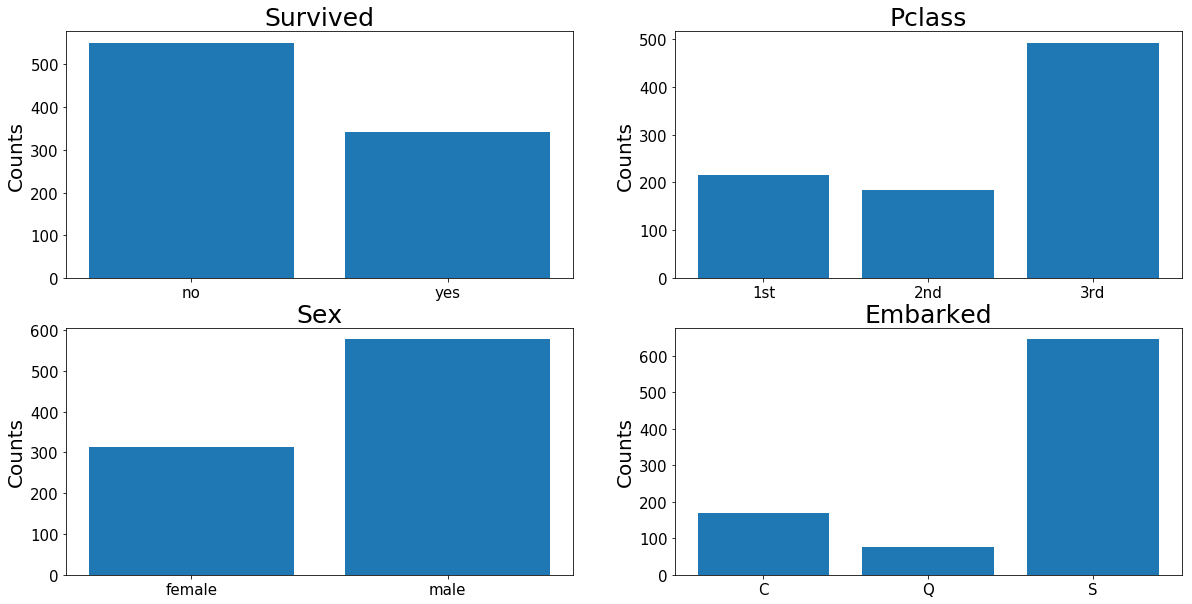

In [49]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_survived, Y_survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

### 2. Are the numerical variables correlated?

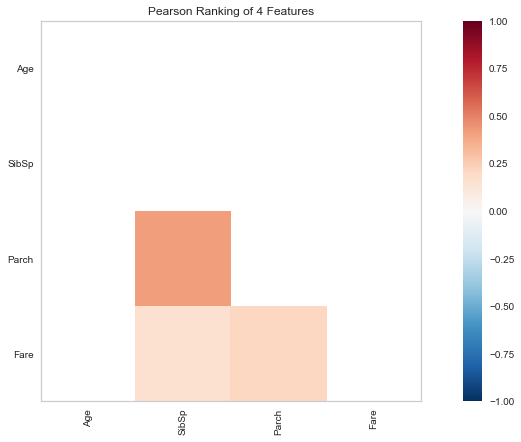

In [81]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

From the pearson ranking figure above, we can see that the correlation between variables are low (<0.5).

### 3. Are the distribution of numerical variables the same or different among survived and not survived? 

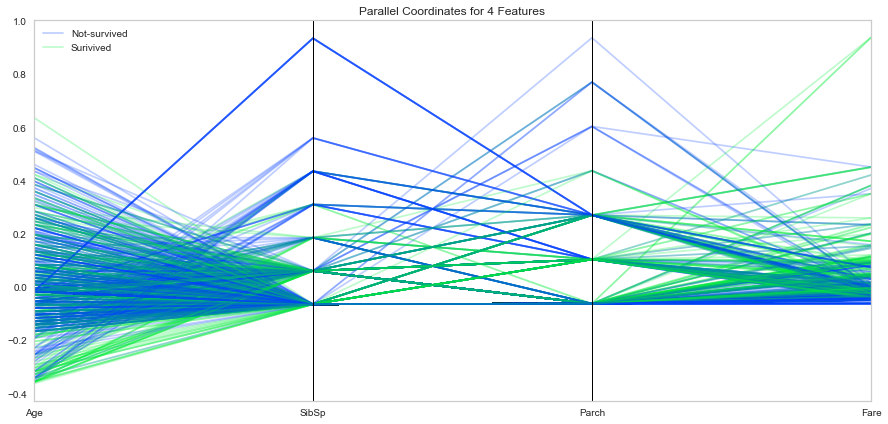

In [195]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Surivived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.Survived.as_matrix()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

We can see from the figure that lots of passengers with more siblings on the boat have a higher death rate. Passengers paid a higher fare survived more. 

### 4. Are there different survival rates in different categories?  

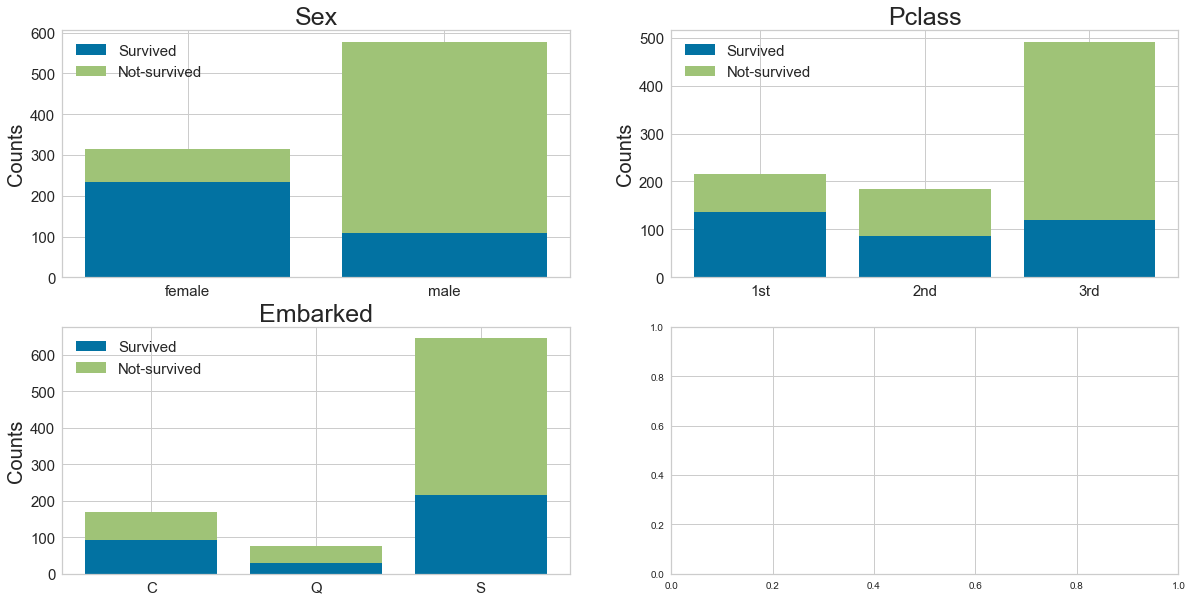

In [143]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visulizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visulizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)

As we can see from upper figures, there are more female survived. And the death rate in the 3rd ticket class and the embarkation from Southampton port is much higher than the others. 

## Feature selection and feature engineering
------
In this step, we will do lots of things to the features, such as drop some features, filling the missing value, log transformation, and One Hot Encoding for the categorical features.

### Features we will not use in our model
We will delete the features "PassengerId", "Name", "Ticket" and "Cabin" from our model. The reasons are as follows:
1. "PassengerId": just a serires of numbers from 1 - 891 which is used to label each person.
2. "Name": the names of all the passengers, which might give some information like if there are some people are related based on the last names. But to simplify things up at this stage, I will pass this feature. 
3. "Ticket" and "Cabin": too many levels with unknown information.

### Missing value filling
From EDA, we know there are some missing value in "Age", "Cabin" and "Embarked" variables. Since we are not going to use "Cabin" feature, we will just fill "Age" and "Embarked". I will fill the missing value in "Age" using the median age and fill the missing value in "Embarked" with "S" since there are only 2 values missing and "S" is the most represent in the dataset. If you want to know more about missing data, there is a article I liked that is very easy to read: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

Just want to mention that from here on I will use functions for data preprocessing so you can reuse them on new test data without the pain of going through all the process again. And also, these functions can be used to generate pipelines to make things even easier.

In [153]:
# fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age'])

# check the result
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [154]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['Embarked'])

# check the result
data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

### Log-transformation of the "Fare"
From the histogram we can see that the distribution "Fare" is highly right-skewed. For highly-skewed positive data, one of the strategy is to use log-transformation to treat it so the skewness will be less. Since the minumum is 0, we will add 1 to the raw value, so there will not be any errors when using log-transformation.

In [155]:
# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['Fare_log1p'] = log_transformation(data['Fare'])

# check the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


### One Hot Encoding for the categorical features
I will use One Hot Encoding one the categorical features to tranform them into numbers. If you want to know more about One Hot Encoding, there's a Quora question you can follow: https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science

In [163]:
# get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


## Model training and model evaluation
------
Here I will put model training and model evaluation in one part since yellowbrick is a very good package that can wrap the model and creates good visulization of the model performance which makes the model evaluation much easier and fun.

### Create data for the model training and evaluation
Before we train the model, we will need to split the data into 2 sets: training and validation. We will use the training dataset to train the model and use the validation dataset to evaluate the model. If you want to know more about training, and validation data, please check the following link: https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set

In [166]:
# create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# check the data
data_model_X.head()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0,0,1,0,1,0,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0
2,26.0,0,0,2.188856,0,0,1,1,0,0,0,1
3,35.0,1,0,3.990834,1,0,0,1,0,0,0,1
4,35.0,0,0,2.202765,0,0,1,0,1,0,0,1


In [181]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

# check the data
data_model_y.head()

0    Not_survived
1        Survived
2        Survived
3        Survived
4    Not_survived
Name: Survived, dtype: object

### Model training and evaluation visulization using yellowbrick
For the purpose of this project is to predict if one passenger was survived or not, it's a classification problem. There are lots of algorithms that can be used to do classification modeling. Here I will use logistic regression. 
And the following link introduced some machine learning algorithms in a way that is very easy to understand: https://towardsdatascience.com/10-machine-learning-algorithms-you-need-to-know-77fb0055fe0  

There are lots of evaluation metrics you can use to evaluate your model for classification problem. Here I will use Confusion Matrix, precision, recall, F1 score, and ROC curve. Here are some links about those evaluation matrix:  
* Confusion Matrix, precision, recall: https://www.sanyamkapoor.com/machine-learning/confusion-matrix-visualization/  
* F1 score: http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/  
* ROC curve: https://classeval.wordpress.com/introduction/introduction-to-the-roc-receiver-operating-characteristics-plot/   

#### Confusion Matrix

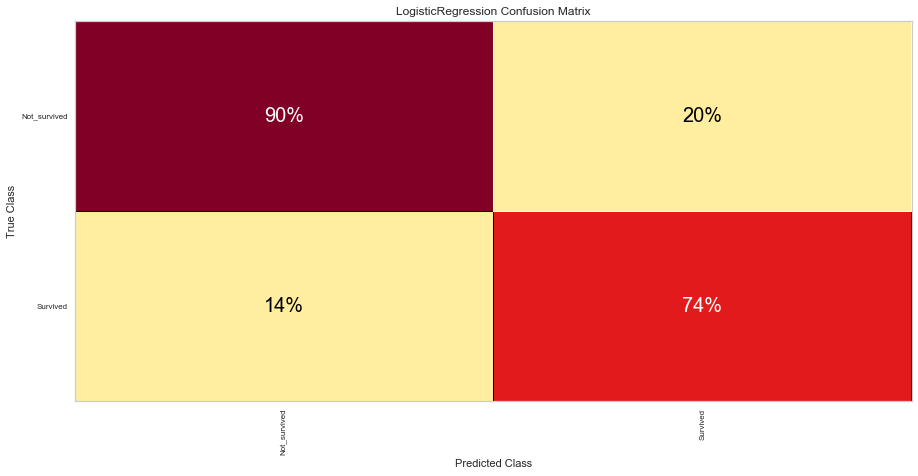

In [209]:
# import packages
import yellowbrick

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X,data_model_y, test_size =0.3, random_state=11)

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

#### Precision, recall and F1 score

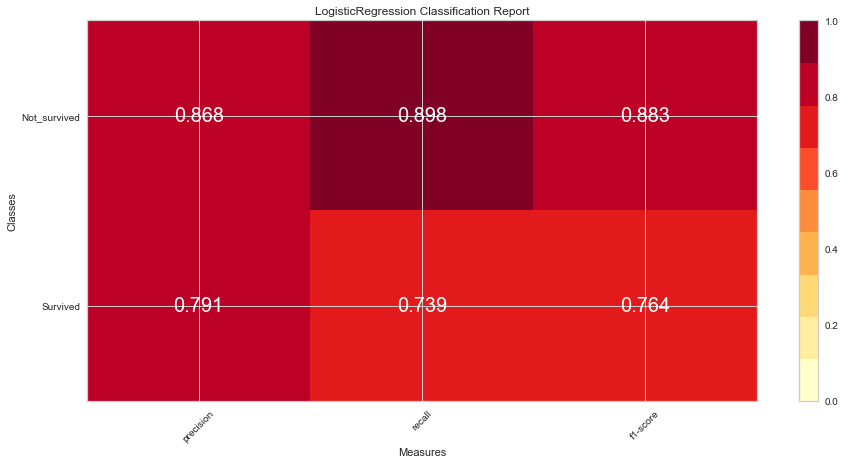

In [204]:
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

#### ROC curve

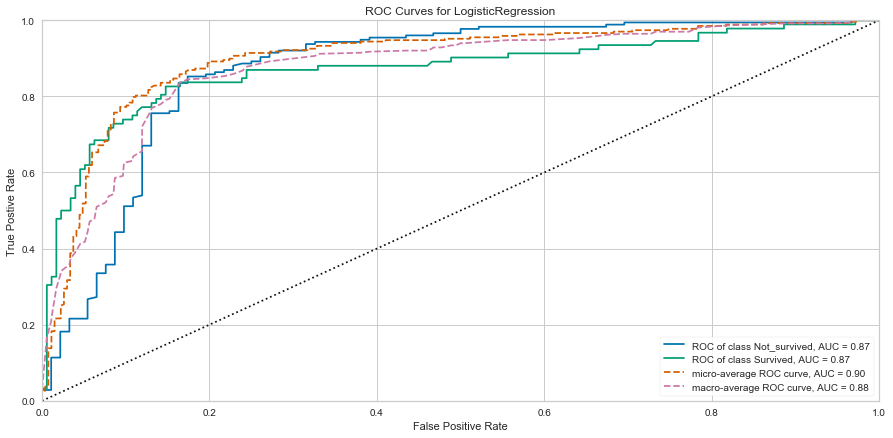

In [207]:
# Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## References:
[1] https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century   
[2] https://www.kaggle.com/c/titanic/data  
